In [46]:

from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nsfg
import brfss
import matplotlib
import thinkstats2
import thinkplot
import scipy
import math 

import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import brfss
import matplotlib
import scipy


In [49]:
resp = nsfg.ReadFemResp()

In [50]:
meanTimesmar = resp['timesmar'].dropna().mean()

meanTimesmar


1.387057682985943

In [51]:
stdTimesmar = resp['timesmar'].dropna().std()
stdTimesmar

4.297113023253083

In [52]:
meanJintendn = resp['jintendn'].dropna().mean()
meanJintendn

2.7052556818181817

In [53]:
stdJintendn = resp['jintendn'].dropna().std()
stdJintendn

9.710108051456988

In [54]:
pdfTimesmar = thinkstats2.NormalPdf(meanTimesmar, stdTimesmar)
pdfTimesmar.Density(meanTimesmar + stdTimesmar)


0.05631006752900393

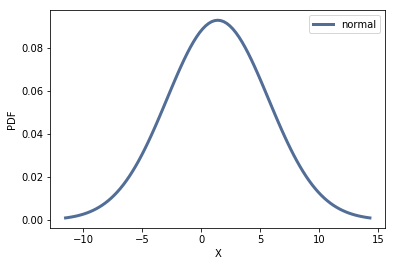

In [55]:
thinkplot.Pdf(pdfTimesmar, label='normal')
thinkplot.Config(xlabel='X', ylabel='PDF')

In [56]:
pdfJintendn = thinkstats2.NormalPdf(meanJintendn, stdJintendn)
pdfJintendn.Density(meanJintendn + stdJintendn)

0.024919467758428907

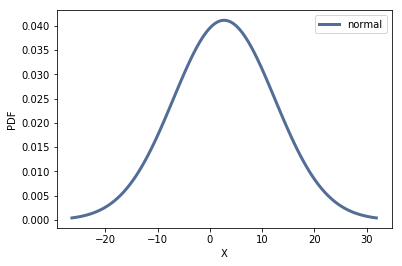

In [57]:
thinkplot.Pdf(pdfJintendn, label='normal')
thinkplot.Config(xlabel='X', ylabel='PDF')

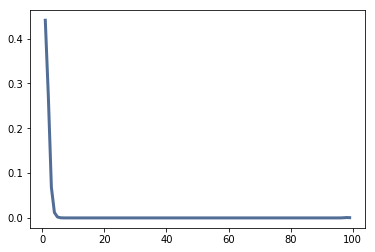

In [58]:
sample_1 = thinkstats2.EstimatedPdf(resp['timesmar'].dropna())
thinkplot.Pdf(sample_1, label='KDE')

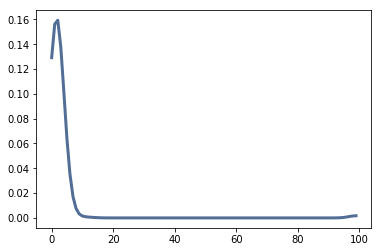

In [59]:
sample_2 = thinkstats2.EstimatedPdf(resp['jintendn'].dropna())
thinkplot.Pdf(sample_2, label='KDE-2')

In [69]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    
    return CentralMoment(xs, k) / std**k
def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

print (Skewness(resp.jintendn.dropna()))
print (PearsonMedianSkewness(resp.jintendn.dropna()))

9.68691405793
0.5270368429720083


In [71]:
jin=resp.jintendn.dropna()
print (Skewness(jin))

9.68691405793


In [72]:
print (PearsonMedianSkewness(jin))

0.5270368429720083


In [70]:
tim=resp.timesmar.dropna()
print (Skewness(tim))

22.2193072207


In [73]:
print (PearsonMedianSkewness(jin))

0.5270368429720083


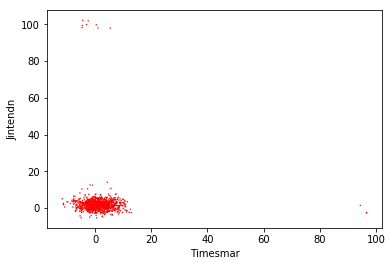

<Figure size 576x432 with 0 Axes>

In [77]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
timesmar = Jitter(tim.head(1000), 4)   
jintendn = Jitter(jin.head(1000), 2)   
thinkplot.Scatter(timesmar, jintendn, alpha=1, s=2,color='red')
thinkplot.show(xlabel='Timesmar', ylabel='Jintendn',legend=False)

In [82]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(-5, 100, 2)
print(bins)
indices = np.digitize(cleaned.timesmar, bins)
print(indices)
groups = cleaned.groupby(indices)
print(groups)
for i, group in groups:
    print(i, len(group))


[-5 -3 -1  1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41
 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89
 91 93 95 97 99]
[4 4 4 ... 4 4 4]
4 1065
5 9


In [80]:
means = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
print (means)

[1.0, 2.0, 3.0, 4.0]


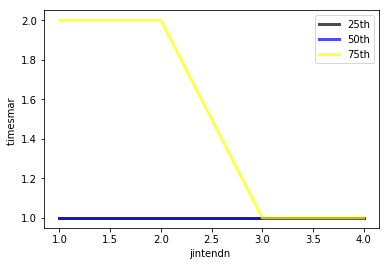

In [85]:
CustomColors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    weight_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(means, weight_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='jintendn ', ylabel='timesmar ', legend=True)

In [87]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
jintendn_jitter = Jitter(resp.jintendn)
timesmar_jiter = Jitter(resp.timesmar)


In [90]:
print (scipy.stats.pearsonr(jintendn_jitter, timesmar_jiter))

(nan, 1.0)


In [97]:
print (scipy.stats.spearmanr(jintendn,timesmar))

SpearmanrResult(correlation=-0.03952362352362353, pvalue=0.2117486774583101)
